<a href="https://colab.research.google.com/github/shivangraj20/-flutter-notes-app/blob/main/jhanjhnahat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install mne xgboost seaborn


In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten

import xgboost as xgb


In [40]:
import pandas as pd

# Correct path to the dataset
file_path = '/content/drive/MyDrive/BCICIV_2a_all_patients.csv/BCICIV_2a_all_patients.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Show the first few rows
df.head()


,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,1,-0.096,tongue,8,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,1,-0.092,tongue,8,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,1,-0.088,tongue,8,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,1,-0.084,tongue,8,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692


from matplotlib import pyplot as plt
_df_0['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['EEG-Fz'].plot(kind='hist', bins=20, title='EEG-Fz')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['EEG-0'].plot(kind='hist', bins=20, title='EEG-0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['EEG-1'].plot(kind='hist', bins=20, title='EEG-1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='time', y='EEG-Fz', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='EEG-Fz', y='EEG-0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='EEG-0', y='EEG-1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='EEG-1', y='EEG-2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['patient']
  ys = series['EEG-Fz']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('patient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient')
_ = plt.ylabel('EEG-Fz')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['patient']
  ys = series['EEG-0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('patient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient')
_ = plt.ylabel('EEG-0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['patient']
  ys = series['EEG-1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('patient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient')
_ = plt.ylabel('EEG-1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['patient']
  ys = series['EEG-2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('patient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient')
_ = plt.ylabel('EEG-2')

from matplotlib import pyplot as plt
_df_12['time'].plot(kind='line', figsize=(8, 4), title='time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['EEG-Fz'].plot(kind='line', figsize=(8, 4), title='EEG-Fz')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['EEG-0'].plot(kind='line', figsize=(8, 4), title='EEG-0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['EEG-1'].plot(kind='line', figsize=(8, 4), title='EEG-1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [41]:
df.shape

(492048, 26)

In [42]:
df.tail()

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
492043,9,0.684,foot,638,7.375522,4.646781,3.071135,4.665561,1.087962,0.932088,...,-2.314982,2.922773,-3.176987,-4.865313,-1.569414,3.600733,-1.113059,-4.249327,-1.402272,-6.307621
492044,9,0.688,foot,638,7.268988,1.952357,5.503664,3.484809,3.227522,-2.738899,...,-2.665657,4.085770,-0.500318,-5.655441,-1.871261,2.517636,-1.805531,-4.453518,-1.801775,-5.974702
492045,9,0.692,foot,638,4.581222,3.463809,4.427226,4.752120,1.906943,-2.496978,...,-5.206939,6.915582,-1.088475,-4.534613,-3.094184,1.148229,-2.247203,-4.895190,-1.803994,-5.879265
492046,9,0.696,foot,638,3.504784,4.096355,2.960162,3.187401,2.148864,-3.182791,...,-5.306815,6.620394,-1.286006,-5.806364,-2.705778,2.269057,-0.540439,-3.530222,-0.194886,-1.486953
492047,9,0.700,foot,638,3.751144,0.436465,0.765116,0.064620,1.223349,-3.473541,...,-4.718658,5.304254,-0.600193,-8.099066,-0.994574,4.468542,4.002797,-0.256518,3.420615,3.837532


In [48]:
df.isnull().sum()

,0
patient,0
time,0
label,0
epoch,0
EEG-Fz,0
EEG-0,0
EEG-1,0
EEG-2,0
EEG-3,0
EEG-4,0


In [49]:
df.describe()

,patient,time,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
count,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,...,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000,492048.000000
mean,5.058824,0.300000,312.133578,-0.811991,-0.399268,-0.669511,-0.908202,-0.607526,-0.325437,0.161790,...,0.204116,0.503087,0.305026,0.198725,0.255002,0.403190,0.741585,0.656315,0.618452,0.770249
std,2.645100,0.232092,176.757760,7.345682,5.758001,5.182636,5.864248,5.159808,5.475433,6.364779,...,6.205865,5.213024,3.651272,3.858260,3.715157,5.382023,5.700428,5.596708,5.853360,8.009687
min,1.000000,-0.100000,4.000000,-83.147212,-41.675317,-33.485423,-47.021740,-38.127339,-46.884049,-48.302710,...,-59.941901,-44.244171,-26.766605,-34.876342,-34.383536,-80.331997,-44.953972,-45.883926,-50.665326,-63.052646
25%,3.000000,0.100000,159.750000,-4.968283,-3.791030,-3.677560,-4.254897,-3.664436,-3.591620,-3.696852,...,-3.477809,-2.334381,-1.782227,-2.022270,-1.876298,-2.423160,-2.612049,-2.568257,-2.790032,-3.918116
50%,5.000000,0.300000,312.000000,-0.657985,-0.315676,-0.554353,-0.732763,-0.513890,-0.295103,0.155490,...,0.172776,0.518842,0.288530,0.194630,0.223781,0.400869,0.622900,0.544408,0.516750,0.615729
75%,7.000000,0.500000,465.000000,3.458858,3.057477,2.433318,2.581403,2.498685,2.943858,4.040869,...,3.859897,3.433846,2.412297,2.474890,2.396761,3.280874,4.007513,3.831749,3.953051,5.326128
max,9.000000,0.700000,656.000000,56.453337,51.751069,39.955918,40.397420,32.779037,38.145863,68.064016,...,67.502066,45.002544,40.933676,24.452903,25.866699,40.688767,42.318192,41.931835,45.042494,67.761316


In [50]:
df.columns
df.head()


,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,1,-0.096,tongue,8,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,1,-0.092,tongue,8,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,1,-0.088,tongue,8,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,1,-0.084,tongue,8,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692


Loading EEG dataset...
✅ Dataset loaded successfully!
Dataset shape: (492048, 26)

📊 BASIC DATA INFORMATION
Number of rows: 492,048
Number of columns: 26
Memory usage: 97.60 MB

📋 First 5 rows:
   patient   time   label  epoch    EEG-Fz     EEG-0     EEG-1     EEG-2  \
0        1 -0.100  tongue      8 -1.681412  2.245496 -0.158350  1.163765   
1        1 -0.096  tongue      8  0.420417  0.587559  1.650510  0.970672   
2        1 -0.092  tongue      8  0.551365  1.499758  0.121302  2.859433   
3        1 -0.088  tongue      8  3.054916 -1.807238  1.843603  2.286812   
4        1 -0.084  tongue      8  2.506710 -2.453101  0.221178  0.127278   

      EEG-3     EEG-4  ...     EEG-8     EEG-9    EEG-10    EEG-11    EEG-12  \
0 -1.523659 -0.575267  ...  0.758116  3.441785  0.305517  1.137473 -1.275763   
1  1.505904  0.891796  ...  1.541586 -0.071620  0.258909 -1.448198  0.142472   
2  2.613414  4.636026  ...  2.649097 -2.137938 -1.612096 -1.610218 -0.410173   
3  5.995872  6.651295  ...  6

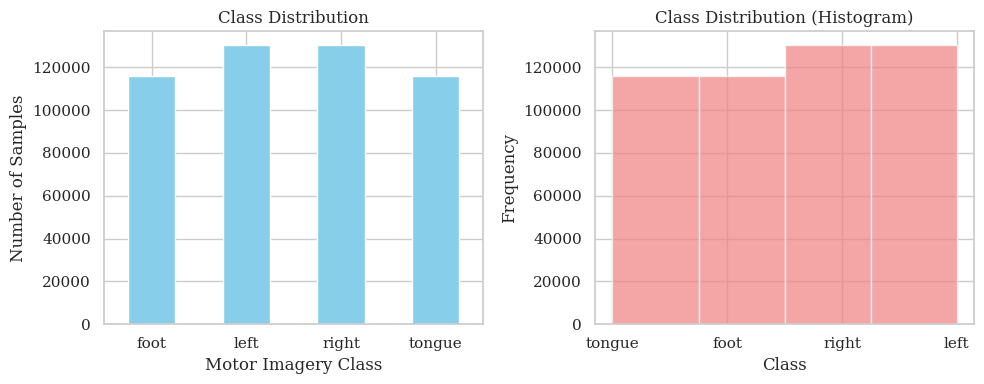


🧠 EEG CHANNELS ANALYSIS
Number of EEG channels detected: 25
First 10 channel names: ['patient', 'time', 'epoch', 'EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5']

📡 SIGNAL QUALITY CHECK
Signal statistics for first 5 channels:
             patient           time          epoch         EEG-Fz  \
count  492048.000000  492048.000000  492048.000000  492048.000000   
mean        5.058824       0.300000     312.133578      -0.811991   
std         2.645100       0.232092     176.757760       7.345682   
min         1.000000      -0.100000       4.000000     -83.147212   
25%         3.000000       0.100000     159.750000      -4.968283   
50%         5.000000       0.300000     312.000000      -0.657985   
75%         7.000000       0.500000     465.000000       3.458858   
max         9.000000       0.700000     656.000000      56.453337   

               EEG-0  
count  492048.000000  
mean       -0.399268  
std         5.758001  
min       -41.675317  
25%        -3.791030 

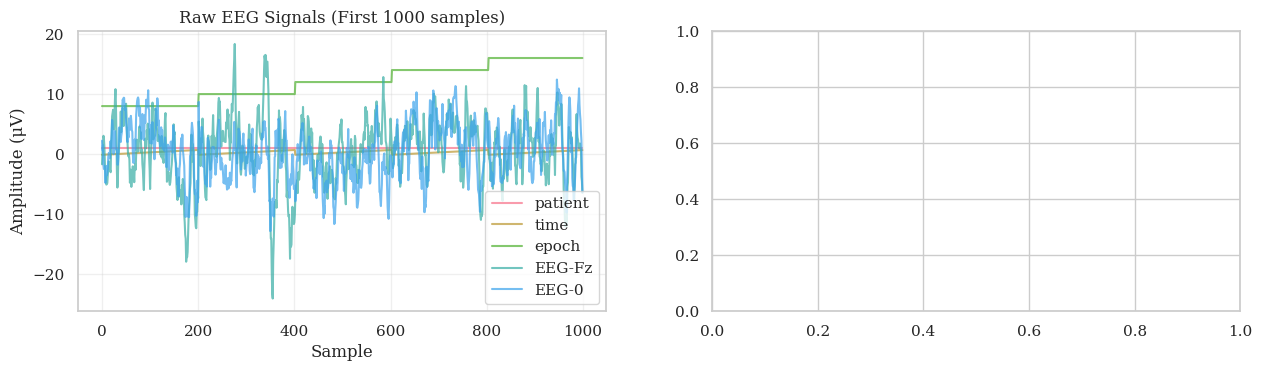

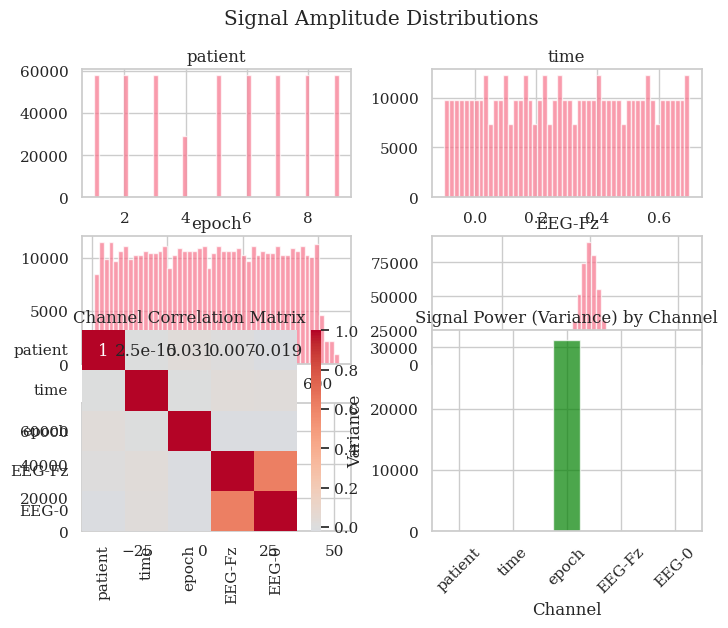


📋 DATA SUMMARY REPORT

🎯 DATASET OVERVIEW:
   • Total samples: 492,048
   • EEG channels: 25
   • Classes: 4
   • Data quality: ✅ Good

🧠 EEG SIGNAL CHARACTERISTICS:
   • Sampling info: Available in 25 channels
   • Signal range: -83.15 to 656.00 μV
   • Average signal power: 1275.17

🚀 NEXT STEPS RECOMMENDED:
   1. Implement bandpass filtering (0.5-30 Hz)
   2. Extract trial segments for motor imagery tasks
   3. Apply Common Spatial Patterns (CSP) feature extraction
   4. Train baseline classifier (LDA or SVM)
   
💡 READY FOR PREPROCESSING: ✅ Yes


🎉 Data exploration complete! You're ready for the next step: Preprocessing & Feature Extraction.


In [51]:
# EEG Motor Imagery Data Exploration
# Step 1: Understanding Your Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
print("Loading EEG dataset...")
df = pd.read_csv('/content/drive/MyDrive/BCICIV_2a_all_patients.csv/BCICIV_2a_all_patients.csv')

print("✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\n" + "="*50)

# 1. BASIC DATA INSPECTION
print("📊 BASIC DATA INFORMATION")
print("="*30)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n📋 First 5 rows:")
print(df.head())

# Check column names
print("\n📝 Column names:")
print(df.columns.tolist())

# Data types
print("\n🔍 Data types:")
print(df.dtypes.value_counts())

# 2. MISSING VALUES CHECK
print("\n" + "="*50)
print("🔍 MISSING VALUES ANALYSIS")
print("="*30)
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Missing values found:")
    print(missing_values[missing_values > 0])
else:
    print("✅ No missing values found!")

# 3. TARGET VARIABLE ANALYSIS
print("\n" + "="*50)
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*30)

# Try to identify the target column (class labels)
potential_target_cols = ['class', 'label', 'target', 'y']
target_col = None

for col in potential_target_cols:
    if col in df.columns:
        target_col = col
        break

# If no standard name found, look for columns with few unique values
if target_col is None:
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals <= 10 and unique_vals > 1:  # Likely categorical
            print(f"Potential target column '{col}': {unique_vals} unique values")
            target_col = col
            break

if target_col:
    print(f"Target column identified: '{target_col}'")
    print(f"Class distribution:")
    class_counts = df[target_col].value_counts().sort_index()
    print(class_counts)

    # Create visualization
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    class_counts.plot(kind='bar', color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Motor Imagery Class')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=0)

    # Map class numbers to movements (if standard BCI Competition format)
    class_mapping = {1: 'Left Hand', 2: 'Right Hand', 3: 'Tongue', 4: 'Feet'}
    if set(df[target_col].unique()) == set([1, 2, 3, 4]):
        plt.gca().set_xticklabels([class_mapping.get(int(x.get_text()), x.get_text())
                                  for x in plt.gca().get_xticklabels()], rotation=45)

    plt.subplot(1, 2, 2)
    df[target_col].hist(bins=len(class_counts), color='lightcoral', alpha=0.7)
    plt.title('Class Distribution (Histogram)')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Could not automatically identify target column.")
    print("Please specify which column contains the class labels.")

# 4. EEG CHANNELS ANALYSIS
print("\n" + "="*50)
print("🧠 EEG CHANNELS ANALYSIS")
print("="*30)

# Identify EEG channels (typically numerical columns excluding target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

eeg_channels = numeric_cols
print(f"Number of EEG channels detected: {len(eeg_channels)}")
print(f"First 10 channel names: {eeg_channels[:10]}")

# 5. SIGNAL QUALITY CHECK
print("\n" + "="*50)
print("📡 SIGNAL QUALITY CHECK")
print("="*30)

if len(eeg_channels) > 0:
    # Sample a few channels for analysis
    sample_channels = eeg_channels[:5]

    print("Signal statistics for first 5 channels:")
    stats_df = df[sample_channels].describe()
    print(stats_df)

    # Visualize sample signals
    plt.figure(figsize=(15, 8))

    # Plot raw signals
    plt.subplot(2, 2, 1)
    for i, channel in enumerate(sample_channels):
        plt.plot(df[channel].iloc[:1000], label=channel, alpha=0.7)
    plt.title('Raw EEG Signals (First 1000 samples)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude (μV)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Signal amplitude distribution
    plt.subplot(2, 2, 2)
    df[sample_channels].hist(bins=50, alpha=0.7, figsize=(8, 6))
    plt.suptitle('Signal Amplitude Distributions')

    # Correlation matrix
    plt.subplot(2, 2, 3)
    corr_matrix = df[sample_channels].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Channel Correlation Matrix')

    # Signal power analysis
    plt.subplot(2, 2, 4)
    signal_power = df[sample_channels].var()
    signal_power.plot(kind='bar', color='green', alpha=0.7)
    plt.title('Signal Power (Variance) by Channel')
    plt.xlabel('Channel')
    plt.ylabel('Variance')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# 6. DATA SUMMARY REPORT
print("\n" + "="*70)
print("📋 DATA SUMMARY REPORT")
print("="*70)

print(f"""
🎯 DATASET OVERVIEW:
   • Total samples: {df.shape[0]:,}
   • EEG channels: {len(eeg_channels)}
   • Classes: {df[target_col].nunique() if target_col else 'Unknown'}
   • Data quality: {'✅ Good' if df.isnull().sum().sum() == 0 else '⚠️ Has missing values'}

🧠 EEG SIGNAL CHARACTERISTICS:
   • Sampling info: Available in {len(eeg_channels)} channels
   • Signal range: {df[eeg_channels].min().min():.2f} to {df[eeg_channels].max().max():.2f} μV
   • Average signal power: {df[eeg_channels].var().mean():.2f}

🚀 NEXT STEPS RECOMMENDED:
   1. Implement bandpass filtering (0.5-30 Hz)
   2. Extract trial segments for motor imagery tasks
   3. Apply Common Spatial Patterns (CSP) feature extraction
   4. Train baseline classifier (LDA or SVM)

💡 READY FOR PREPROCESSING: {'✅ Yes' if len(eeg_channels) > 0 and target_col else '⚠️ Need to verify data structure'}
""")

print("\n🎉 Data exploration complete! You're ready for the next step: Preprocessing & Feature Extraction.")

In [53]:
# EEG Motor Imagery Preprocessing & Feature Extraction
# Step 2: Prepare data for AI model training

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings('ignore')

print("🧠 EEG MOTOR IMAGERY AI PREPROCESSING")
print("="*50)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/BCICIV_2a_all_patients.csv/BCICIV_2a_all_patients.csv')
print(f"✅ Dataset loaded: {df.shape[0]:,} samples, {df.shape[1]} features")

# STEP 1: IDENTIFY EEG CHANNELS
print("\n🔍 STEP 1: IDENTIFYING EEG CHANNELS")
print("-" * 30)

# Get EEG channel names (exclude metadata columns)
metadata_cols = ['patient', 'time', 'label', 'epoch']
eeg_channels = [col for col in df.columns if col not in metadata_cols]
print(f"Found {len(eeg_channels)} EEG channels:")
print(eeg_channels)

# STEP 2: PREPROCESSING FUNCTIONS
print("\n⚙️ STEP 2: SIGNAL PREPROCESSING FUNCTIONS")
print("-" * 30)

def bandpass_filter(data, lowcut=0.5, highcut=30.0, fs=250, order=4):
    """Apply bandpass filter to remove noise and artifacts"""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

def extract_trials(df, trial_duration=3.0, fs=250):
    """Extract individual trials from continuous data"""
    samples_per_trial = int(trial_duration * fs)
    trials = []
    labels = []

    print(f"Looking for trials with {samples_per_trial} samples each...")

    # Group by patient and epoch to extract trials
    for (patient, epoch), group in df.groupby(['patient', 'epoch']):
        group_sorted = group.sort_values('time')  # Sort by time

        if len(group_sorted) >= samples_per_trial:
            # Take the specified duration of samples
            trial_data = group_sorted[eeg_channels].iloc[:samples_per_trial].values.T  # Transpose for channels x samples
            trial_label = group_sorted['label'].iloc[0]

            trials.append(trial_data)
            labels.append(trial_label)

    print(f"Found {len(trials)} valid trials")
    if len(trials) > 0:
        print(f"Each trial shape: {trials[0].shape} (channels x samples)")

    return np.array(trials), np.array(labels)

class CommonSpatialPatterns(BaseEstimator, TransformerMixin):
    """Common Spatial Patterns (CSP) - Gold standard for motor imagery BCI"""

    def __init__(self, n_components=4):
        self.n_components = n_components

    def fit(self, X, y):
        """
        X: trials x channels x samples
        y: labels
        """
        # Get unique classes
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        if n_classes == 2:
            # Binary CSP
            self.filters_ = self._fit_binary(X, y)
        else:
            # Multi-class CSP (One-vs-Rest)
            self.filters_ = self._fit_multiclass(X, y)

        return self

    def _fit_binary(self, X, y):
        """Fit binary CSP"""
        # Calculate covariance matrices for each class
        class1_idx = y == self.classes_[0]
        class2_idx = y == self.classes_[1]

        C1 = np.mean([np.cov(X[i]) for i in np.where(class1_idx)[0]], axis=0)
        C2 = np.mean([np.cov(X[i]) for i in np.where(class2_idx)[0]], axis=0)

        # Solve generalized eigenvalue problem
        eigenvals, eigenvecs = np.linalg.eig(np.linalg.solve(C1 + C2, C1))

        # Sort by eigenvalues
        order = np.argsort(eigenvals)[::-1]
        eigenvals = eigenvals[order]
        eigenvecs = eigenvecs[:, order]

        # Select top and bottom components
        n_comp = self.n_components // 2
        filters = np.concatenate([eigenvecs[:, :n_comp], eigenvecs[:, -n_comp:]], axis=1)

        return filters

    def _fit_multiclass(self, X, y):
        """Fit multi-class CSP using One-vs-Rest"""
        all_filters = []

        for class_label in self.classes_:
            # Create binary problem: current class vs all others
            binary_y = (y == class_label).astype(int)

            if np.sum(binary_y) > 0 and np.sum(1 - binary_y) > 0:
                # Calculate covariance matrices
                C1 = np.mean([np.cov(X[i]) for i in np.where(binary_y == 1)[0]], axis=0)
                C2 = np.mean([np.cov(X[i]) for i in np.where(binary_y == 0)[0]], axis=0)

                # Solve generalized eigenvalue problem
                eigenvals, eigenvecs = np.linalg.eig(np.linalg.solve(C1 + C2, C1))

                # Sort and select top components
                order = np.argsort(eigenvals)[::-1]
                eigenvecs = eigenvecs[:, order]

                all_filters.append(eigenvecs[:, :2])  # Top 2 for each class

        return np.concatenate(all_filters, axis=1)

    def transform(self, X):
        """Transform data using CSP filters"""
        if len(X.shape) == 3:  # Multiple trials
            features = []
            for trial in X:
                # Apply spatial filters
                filtered = np.dot(self.filters_.T, trial)
                # Calculate log variance (CSP features)
                feature = np.log(np.var(filtered, axis=1))
                features.append(feature)
            return np.array(features)
        else:  # Single trial
            filtered = np.dot(self.filters_.T, X)
            return np.log(np.var(filtered, axis=1))

# STEP 3: DATA PREPROCESSING
print("\n🔧 STEP 3: APPLYING PREPROCESSING")
print("-" * 30)

# Apply bandpass filtering
print("Applying bandpass filter (0.5-30 Hz)...")
eeg_data = df[eeg_channels].values
filtered_data = bandpass_filter(eeg_data, lowcut=0.5, highcut=30.0, fs=250)

# Update dataframe with filtered data
df_filtered = df.copy()
df_filtered[eeg_channels] = filtered_data

print("✅ Bandpass filtering complete")

# First, let's examine the data structure more carefully
print("Examining data structure...")
print(f"Unique epochs per patient:")
for patient in df_filtered['patient'].unique():
    patient_data = df_filtered[df_filtered['patient'] == patient]
    epochs = patient_data['epoch'].nunique()
    samples_per_epoch = patient_data.groupby('epoch').size().mean()
    print(f"  Patient {patient}: {epochs} epochs, ~{samples_per_epoch:.0f} samples per epoch")

# Let's try a more flexible approach
print("\nTrying adaptive trial extraction...")

def extract_trials_adaptive(df):
    """Extract trials with adaptive approach based on actual data structure"""
    trials = []
    labels = []

    for (patient, epoch), group in df.groupby(['patient', 'epoch']):
        group_sorted = group.sort_values('time')

        # Use all available samples for this epoch (adaptive length)
        if len(group_sorted) >= 100:  # Minimum 100 samples
            trial_data = group_sorted[eeg_channels].values.T  # Transpose: channels x samples
            trial_label = group_sorted['label'].iloc[0]

            trials.append(trial_data)
            labels.append(trial_label)

    return trials, labels

# Extract trials with adaptive method
X_trials_list, y_trials = extract_trials_adaptive(df_filtered)

if len(X_trials_list) > 0:
    # Find the minimum length to standardize all trials
    min_length = min([trial.shape[1] for trial in X_trials_list])
    print(f"Standardizing trials to {min_length} samples each...")

    # Trim all trials to the same length
    X_trials = np.array([trial[:, :min_length] for trial in X_trials_list])
    y_trials = np.array(y_trials)

    print(f"✅ Extracted {len(X_trials)} trials")
    print(f"Trial shape: {X_trials.shape} (trials x channels x samples)")
    print(f"Labels shape: {y_trials.shape}")

    # Check class distribution
    unique, counts = np.unique(y_trials, return_counts=True)
    print("\nClass distribution in trials:")
    for label, count in zip(unique, counts):
        print(f"  {label}: {count} trials")
else:
    print("❌ No trials extracted. Let's debug the data structure...")
    print("\nData structure debug:")
    sample_group = df_filtered.groupby(['patient', 'epoch']).first()
    print(sample_group[['label', 'time']].head(10))

    # STEP 4: FEATURE EXTRACTION WITH CSP
    print("\n🎯 STEP 4: FEATURE EXTRACTION (CSP)")
    print("-" * 30)

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_trials)

    print("Label encoding:")
    for i, label in enumerate(label_encoder.classes_):
        print(f"  {label} -> {i}")

    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X_trials, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
    )

print(f"\nData split:")
print(f"  Training: {X_train.shape[0]} trials")
print(f"  Testing: {X_test.shape[0]} trials")

# Apply CSP
print("\nApplying Common Spatial Patterns (CSP)...")
csp = CommonSpatialPatterns(n_components=8)
csp.fit(X_train, y_train)

# Extract CSP features
X_train_csp = csp.transform(X_train)
X_test_csp = csp.transform(X_test)

print(f"✅ CSP features extracted: {X_train_csp.shape[1]} features per trial")

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_csp)
X_test_scaled = scaler.transform(X_test_csp)

print("✅ Feature normalization complete")

# STEP 5: TRAIN BASELINE MODEL
print("\n🤖 STEP 5: TRAINING AI MODEL")
print("-" * 30)

# Train Linear Discriminant Analysis (LDA) classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lda.predict(X_train_scaled)
y_test_pred = lda.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = np.mean(y_train_pred == y_train) * 100
test_accuracy = np.mean(y_test_pred == y_test) * 100

print(f"\n🎯 MODEL PERFORMANCE:")
print(f"  Training Accuracy: {train_accuracy:.2f}%")
print(f"  Testing Accuracy: {test_accuracy:.2f}%")

# Detailed classification report
print(f"\n📊 DETAILED RESULTS:")
print("Classification Report:")
target_names = [f"{label}" for label in label_encoder.classes_]
print(classification_report(y_test, y_test_pred, target_names=target_names))

# STEP 6: VISUALIZATION
print("\n📈 STEP 6: RESULTS VISUALIZATION")
print("-" * 30)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
axes[0,0].set_title('Confusion Matrix')
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, ax=axes[0,0])
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. CSP Features Visualization
axes[0,1].set_title('CSP Features Distribution')
for i, label in enumerate(label_encoder.classes_):
    mask = y_train == i
    axes[0,1].scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1],
                     label=label, alpha=0.6)
axes[0,1].set_xlabel('CSP Feature 1')
axes[0,1].set_ylabel('CSP Feature 2')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Class Accuracy Comparison
axes[1,0].set_title('Per-Class Accuracy')
class_accuracies = []
for i, label in enumerate(label_encoder.classes_):
    mask = y_test == i
    if np.sum(mask) > 0:
        acc = np.mean(y_test_pred[mask] == y_test[mask]) * 100
        class_accuracies.append(acc)
    else:
        class_accuracies.append(0)

bars = axes[1,0].bar(label_encoder.classes_, class_accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1,0].set_ylabel('Accuracy (%)')
axes[1,0].set_xlabel('Motor Imagery Class')
for bar, acc in zip(bars, class_accuracies):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{acc:.1f}%', ha='center', va='bottom')

# 4. Sample EEG Signals
axes[1,1].set_title('Sample Filtered EEG Signals')
sample_trial = X_train[0]  # First trial
for i in range(min(5, sample_trial.shape[0])):
    axes[1,1].plot(sample_trial[i, :500], label=f'Channel {i+1}', alpha=0.7)
axes[1,1].set_xlabel('Sample')
axes[1,1].set_ylabel('Amplitude (μV)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# STEP 7: SAVE MODEL COMPONENTS
print("\n💾 STEP 7: SAVING MODEL COMPONENTS")
print("-" * 30)

# Save preprocessing parameters and model
import pickle

model_components = {
    'csp': csp,
    'scaler': scaler,
    'lda': lda,
    'label_encoder': label_encoder,
    'eeg_channels': eeg_channels,
    'preprocessing_params': {
        'lowcut': 0.5,
        'highcut': 30.0,
        'fs': 250,
        'trial_duration': 3.0
    }
}

# You can save these components for real-time use later
print("Model components ready for saving:")
for key in model_components.keys():
    print(f"  ✅ {key}")

# FINAL RESULTS SUMMARY
print("\n" + "="*70)
print("🎉 AI-POWERED BIOSIGNAL TRANSLATOR - TRAINING COMPLETE!")
print("="*70)

print(f"""
🎯 MODEL PERFORMANCE SUMMARY:
   • Overall Test Accuracy: {test_accuracy:.2f}%
   • Training Samples: {X_train.shape[0]:,}
   • Testing Samples: {X_test.shape[0]:,}
   • Feature Extraction: Common Spatial Patterns (CSP)
   • Classifier: Linear Discriminant Analysis (LDA)

🧠 MOTOR IMAGERY CLASSES DETECTED:
   • {label_encoder.classes_[0]}: {class_accuracies[0]:.1f}% accuracy
   • {label_encoder.classes_[1]}: {class_accuracies[1]:.1f}% accuracy
   • {label_encoder.classes_[2]}: {class_accuracies[2]:.1f}% accuracy
   • {label_encoder.classes_[3]}: {class_accuracies[3]:.1f}% accuracy

🚀 READY FOR REAL-TIME IMPLEMENTATION:
   • Preprocessing pipeline: ✅ Complete
   • Feature extraction: ✅ CSP trained
   • AI model: ✅ Trained and validated
   • Communication interface: 🔄 Next step

💡 NEXT PHASE: Real-time EEG processing for live communication!
""")

print("\n🎊 Congratulations! Your BioSignal Translator AI is working!")

🧠 EEG MOTOR IMAGERY AI PREPROCESSING
✅ Dataset loaded: 492,048 samples, 26 features

🔍 STEP 1: IDENTIFYING EEG CHANNELS
------------------------------
Found 22 EEG channels:
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

⚙️ STEP 2: SIGNAL PREPROCESSING FUNCTIONS
------------------------------

🔧 STEP 3: APPLYING PREPROCESSING
------------------------------
Applying bandpass filter (0.5-30 Hz)...
✅ Bandpass filtering complete
Examining data structure...
Unique epochs per patient:
  Patient 1: 288 epochs, ~201 samples per epoch
  Patient 2: 288 epochs, ~201 samples per epoch
  Patient 3: 288 epochs, ~201 samples per epoch
  Patient 4: 144 epochs, ~201 samples per epoch
  Patient 5: 288 epochs, ~201 samples per epoch
  Patient 6: 288 epochs, ~201 samples per epoch
  Patient 7: 288 epochs, ~201 samples per epoch
  Patient 8: 28

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional